# EDA y Unificación (Provincias + Localidades)

Este notebook realiza:
- Carga y limpieza robusta (regex para valores no numéricos)
- Eliminación de nulos
- Tratamiento de outliers (IQR)
- Análisis descriptivo y visualizaciones
- Unificación de tablas
- Exportación del CSV final


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

prov_df = pd.read_csv('Internet Accesos Velocidad Provincias.csv')
loc_df = pd.read_csv('Internet Accesos Velocidad Localidades.csv')

print('Provincias:', prov_df.shape)
print('Localidades:', loc_df.shape)
prov_df.head()


Provincias: (21767, 5)
Localidades: (24297, 6)


,Año,Trimestre,Provincia,Velocidad,Accesos
0,2025,1,Buenos Aires,0,66.998
1,2025,1,Buenos Aires,1,20.172
2,2025,1,Buenos Aires,2,18.797
3,2025,1,Buenos Aires,3,44.330
4,2025,1,Buenos Aires,4,12.110


## Limpieza robusta con regex

In [2]:

import re
import numpy as np

# Función para limpiar valores
def limpiar_valor(x):
    x = str(x)
    x = re.sub(r"[^0-9,.-]", "", x)  # deja dígitos, coma, punto y guion
    x = x.replace(".", "").replace(",", ".")
    try:
        return float(x)
    except:
        return np.nan

# Aplicar limpieza
prov_df['Velocidad'] = prov_df['Velocidad'].apply(limpiar_valor)
prov_df['Accesos'] = prov_df['Accesos'].apply(limpiar_valor)
loc_df['Velocidad'] = loc_df['Velocidad'].apply(limpiar_valor)
loc_df['Accesos'] = loc_df['Accesos'].apply(limpiar_valor)

# Eliminar nulos
prov_df.dropna(subset=['Velocidad','Accesos'], inplace=True)
loc_df.dropna(subset=['Velocidad','Accesos'], inplace=True)

print('Datos limpios:')
print(prov_df.info())
print(loc_df.info())


Datos limpios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21767 entries, 0 to 21766
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        21767 non-null  int64  
 1   Trimestre  21767 non-null  int64  
 2   Provincia  21767 non-null  object 
 3   Velocidad  21767 non-null  float64
 4   Accesos    21767 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 850.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24297 entries, 0 to 24296
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LinkIndec  24297 non-null  int64  
 1   Provincia  24297 non-null  object 
 2   Partido    24297 non-null  object 
 3   Localidad  24297 non-null  object 
 4   Velocidad  24297 non-null  float64
 5   Accesos    24297 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB
None


## Tratamiento de outliers

In [3]:

# IQR para accesos
for df in [prov_df, loc_df]:
    Q1 = df['Accesos'].quantile(0.25)
    Q3 = df['Accesos'].quantile(0.75)
    IQR = Q3 - Q1
    df.drop(df[(df['Accesos'] < (Q1 - 1.5 * IQR)) | (df['Accesos'] > (Q3 + 1.5 * IQR))].index, inplace=True)

print('Outliers eliminados.')


Outliers eliminados.


## Análisis descriptivo

In [4]:

print(prov_df.describe())
print(loc_df.describe())


                Año     Trimestre     Velocidad       Accesos
count  18780.000000  18780.000000  18780.000000  18780.000000
mean    2021.496645      2.496858    112.776461   2015.575719
std        2.116486      1.149018    409.957401   3254.598615
min     2017.000000      1.000000      0.000000      0.000000
25%     2020.000000      1.000000      4.000000     16.000000
50%     2022.000000      3.000000     15.000000    308.000000
75%     2023.000000      4.000000     60.000000   2589.250000
max     2025.000000      4.000000  10000.000000  14710.000000
          LinkIndec     Velocidad       Accesos
count  2.045900e+04  20459.000000  20459.000000
mean   3.422568e+07    126.874064     39.932108
std    2.956413e+07    252.882888     60.802101
min    0.000000e+00      0.000000     -4.000000
25%    6.638040e+06      4.000000      3.000000
50%    2.200703e+07     15.000000     12.000000
75%    6.204218e+07    226.500000     48.000000
max    9.401402e+07   8192.000000    291.000000


## Visualizaciones

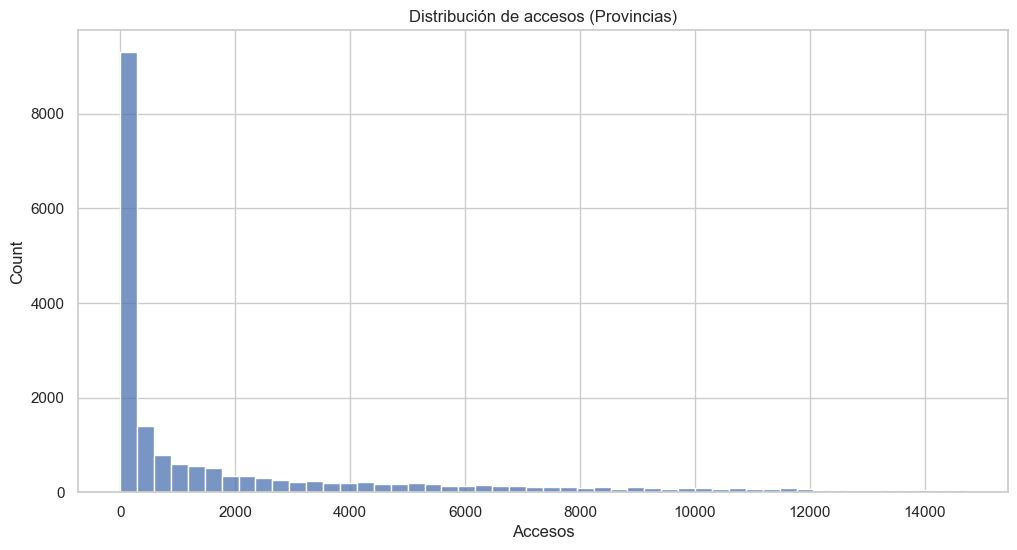

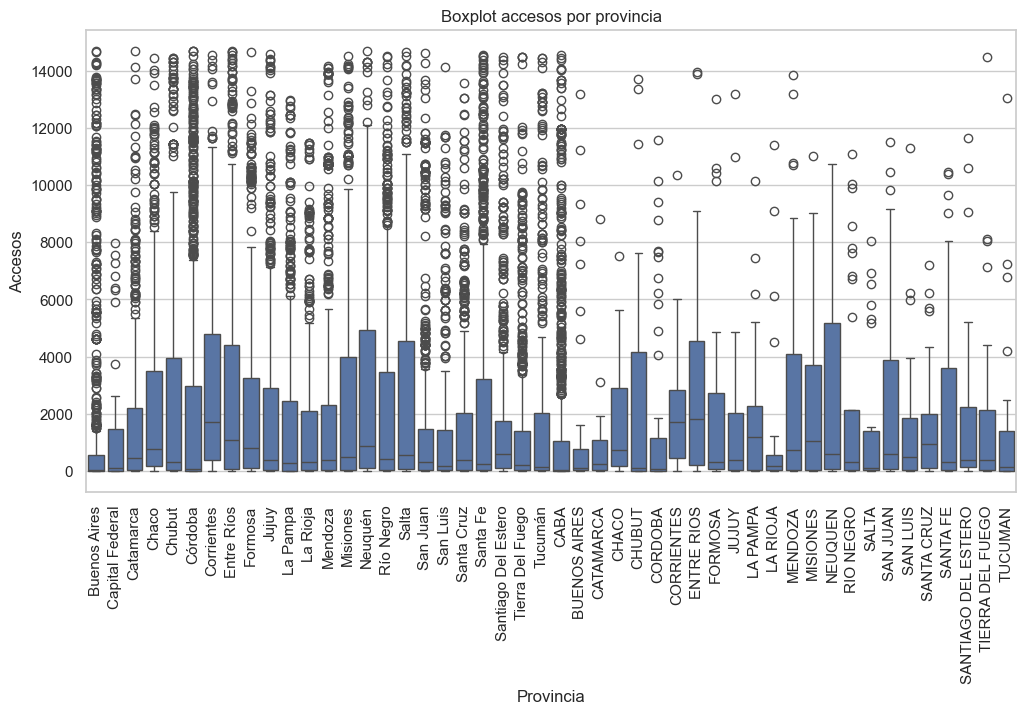

In [5]:

sns.histplot(prov_df['Accesos'], bins=50)
plt.title('Distribución de accesos (Provincias)')
plt.show()

sns.boxplot(x='Provincia', y='Accesos', data=prov_df)
plt.xticks(rotation=90)
plt.title('Boxplot accesos por provincia')
plt.show()


## Unificación de tablas

In [6]:

merged_df = pd.merge(prov_df, loc_df, on=['Provincia','Velocidad'], suffixes=('_prov','_loc'))
print('Dimensiones tabla unificada:', merged_df.shape)
merged_df.head()


Dimensiones tabla unificada: (8473, 9)


,Año,Trimestre,Provincia,Velocidad,Accesos_prov,LinkIndec,Partido,Localidad,Accesos_loc
0,2024,4,CABA,2.0,229.0,2000010,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,232.0
1,2024,4,CABA,0.5,228.0,2000010,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,228.0
2,2024,4,CABA,7.0,11.0,2000010,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,11.0
3,2024,4,CABA,9.0,36.0,2000010,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,34.0
4,2024,4,CABA,11.0,5.0,2000010,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,5.0


## Guardar archivo unificado

In [7]:

output_file = 'Internet_Accesos_Provincias_Localidades_Unificado.csv'
merged_df.to_csv(output_file, sep=',', encoding='utf-8', index=False, float_format='%.2f')
print(f'Archivo guardado como: {output_file}')


Archivo guardado como: Internet_Accesos_Provincias_Localidades_Unificado.csv
